# Matching triangle, and other shapes

In this recipe you learn how to match shapes with each others. Matching shapes can be used to count thing automatically.

In [2]:
(ns stark-spring
 (:require
   [opencv4.utils :as u]
   [opencv4.core :refer :all]))

nil

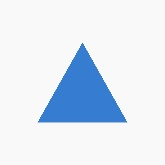

In [3]:
(def t1 
  (->
  "resources/white-blue-triangle.png"
  (imread)
  (u/resize-by 0.2) ))

(u/>>> t1)

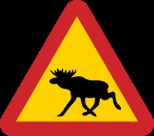

In [4]:
(def t2
  (->
   "resources/Sweden_road_sign_A19-1.svg.png"
   (imread)
   (u/resize-by 0.7) ))

(u/>>> t2)

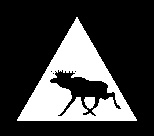

In [5]:
(def lower-red  (new-scalar 70 20 20))
(def upper-red  (new-scalar 100 255 255))
(def mask (new-mat))
(in-range (-> t2 clone (cvt-color! COLOR_RGB2HSV)) lower-red upper-red mask)
(u/>>> mask)

In [6]:

(def contours (new-arraylist))
(find-contours mask contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)

(def indexed  
    (apply hash-map (flatten (map-indexed (fn [idx itm] [idx itm]) contours ))))

(def sorted  
    (into 
      (sorted-map-by 
      (fn [key1 key2]
       (clojure.core/compare  
        (-> (get indexed key1) (.size) (.area))
        (-> (get indexed key2) (.size) (.area))))) 
                   indexed))

(def biggest (last sorted))

#'stark-spring/biggest

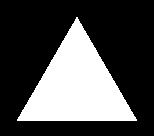

In [7]:
(def output 
  (new-mat (.rows mask) (.cols mask) CV_8UC1 (new-scalar 0 0 0)))

(draw-contours output contours (key biggest)  (new-scalar 255 255 255) FILLED)

(u/>>> output)

In [9]:
(def s1 
  (-> t1 clone (cvt-color! COLOR_BGR2GRAY) (threshold! 210 240 1)))
(u/>>> s1)

(def s2 
  (-> output clone))

(match-shapes 
  (.t s1) 
  (.t s2) CV_CONTOURS_MATCH_I1 0)

0.0026650863543482006